# H0: my solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import os

In [53]:
path = './data/interactive_data.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,Intent,Gender,Age,Race,Deaths,Population,Rate
1,None selected,None selected,None selected,None selected,33599,316299978,10.6
2,None selected,None selected,None selected,White,22079,197369634,11.2
3,None selected,None selected,None selected,Black,7765,38896382,20.0
4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


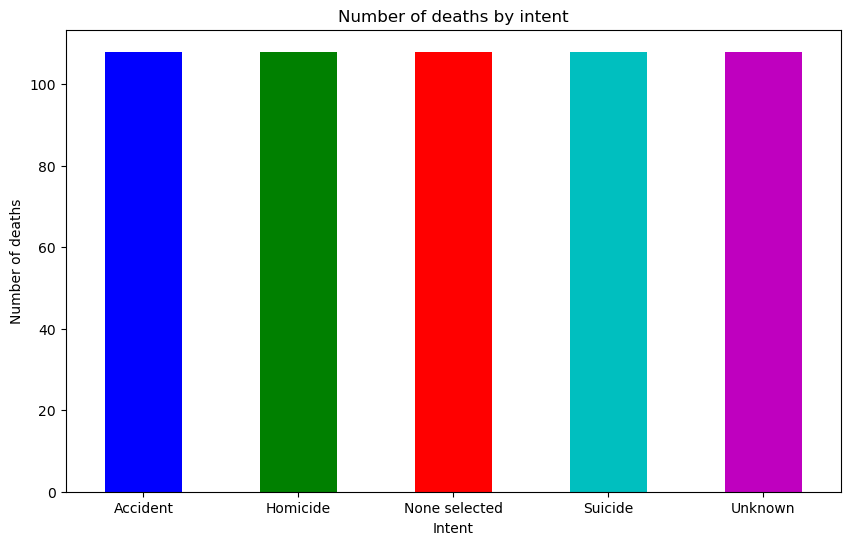

In [5]:
# Group by intent and count the number of deaths
intent = df.groupby('Intent').size()
# Plot the number of deaths by intent
plt.figure(figsize=(10, 6))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
intent.plot(kind='bar', color=colors)
plt.title('Number of deaths by intent')
plt.ylabel('Number of deaths')
plt.xlabel('Intent')
plt.xticks(rotation=0)
plt.show()

In [6]:
intent 

Intent
Accident         108
Homicide         108
None selected    108
Suicide          108
Unknown          108
dtype: int64

The goal of this optional homework is to carefully go through the interactive visualization portrayed at the top of the aforementioned article, and use an IPython Notebook to reproduce the following claims made in the visualization:
- Nearly **two-thirds** of gun deaths are **suicides**.
- More than **85 percent** of suicide victims are **male**.
- Around **a third** of all gun deaths are **homicides**.
- Around **two-thirds** of homicide victims who are **males** in the **age-group of 15--34** are **black**.
- **Women** constitue only **15 percent** of the total **homicide** victims.

In [10]:
filtered_df = df.drop(df[df.eq('None selected').any(axis=1)].index)
filtered_df

,Intent,Gender,Age,Race,Deaths,Population,Rate
152,Suicide,Female,Under 15,White,19,15355910,0.1
153,Suicide,Female,Under 15,Black,1,4095428,0.0
154,Suicide,Female,Under 15,Hispanic,4,7330024,0.1
155,Suicide,Female,Under 15,Asian/Pacific Islander,1,1393440,0.1
156,Suicide,Female,Under 15,Other,0,1661877,0.0
...,...,...,...,...,...,...,...
536,Unknown,Male,5,White,0,0,NaN
537,Unknown,Male,5,Black,0,0,NaN
538,Unknown,Male,5,Hispanic,0,0,NaN
539,Unknown,Male,5,Asian/Pacific Islander,0,0,NaN


Nearly **two-thirds** of gun deaths are **suicides**

In [28]:
total_suicide_deaths = filtered_df[filtered_df['Intent'] == 'Suicide']['Deaths'].sum()
total_gun_deaths = filtered_df['Deaths'].sum()
print(f"{(total_suicide_deaths * 100 / total_gun_deaths):.1f}% of gun deaths are suicides")

62.7% of gun deaths are suicide


More than **85 percent** of suicide victims are **male**

In [32]:
total_male_suicide_deaths = filtered_df[(filtered_df['Gender'] == 'Male') & (filtered_df['Intent'] == 'Suicide')]['Deaths'].sum()
print(f"{(total_male_suicide_deaths * 100 / total_suicide_deaths):.1f}% of suicide victims are male")

86.2% of suicide victims are male


Around **a third** of all gun deaths are **homicides**

In [34]:
number_of_homicides = filtered_df[filtered_df['Intent'] == 'Homicide']['Deaths'].sum()
print(f"{(number_of_homicides * 100 / total_gun_deaths):.1f}% of all gun deaths are homicides")

34.9% of all gun deaths are homicides


Around **two-thirds** of homicide victims who are **males** in the **age-group of 15--34** are **black**

In [47]:
total_male_15_34_homocide_deaths = filtered_df[(filtered_df['Gender'] == 'Male') & (filtered_df['Age'] == '15 - 34') & (filtered_df['Intent'] == 'Homicide')]['Deaths'].sum()
total_15_34_black_male_homocide_deaths = filtered_df[(filtered_df['Gender'] == 'Male') & (filtered_df['Age'] == '15 - 34') & (filtered_df['Intent'] == 'Homicide') & (filtered_df['Race'] == 'Black')]['Deaths'].sum()
print(f"{(total_15_34_black_male_homocide_deaths * 100 / total_male_15_34_homocide_deaths):.1f}% of homicide victims who are males in the age group 15--34 are black")

66.1% of homicide victims who are males in the age group 15--34 are black


**Women** constitue only **15 percent** of the total **homicide** victims

In [55]:
women_homicide_victims = filtered_df[(filtered_df['Gender'] == 'Female') & (filtered_df['Intent'] == 'Homicide')]['Deaths'].sum()
print(f"{(women_homicide_victims * 100 / number_of_homicides):.1f}% of the total homocide victims are women")

15.3% of the total homocide victims are women
